### Training multiple CNNs on CIFAR10 Dataset

Load in libraries

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from torch.autograd import Variable

### Load in datasets and create dataloader for NN

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#want only 20% of training to use as training
train_len = int(len(trainset)*0.2) 
part_tr = torch.utils.data.random_split(trainset, [train_len, len(trainset)-train_len])[0]

trainloader = torch.utils.data.DataLoader(part_tr, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Show some images

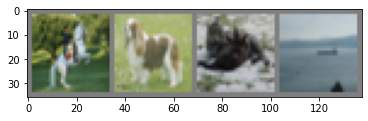

horse dog   cat   ship 


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## MLP:

Define the multilayer perceptron

In [ ]:
class MLP1(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(32*32*3, 512)
        self.sig1 = nn.Sigmoid()

        self.fc2 = nn.Linear(512, 512)
        self.sig2 = nn.Sigmoid()

        self.output = nn.Linear(512, 10)
        self.sig3 = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, 1)
        
        x = self.fc1(x)
        x = self.sig1(x)

        x = self.fc2(x)
        x = self.sig2(x)

        x = self.output(x)
        x = self.sig3(x)

        return x
  
mlp1 = MLP1()

Define Loss function and Optimizer 

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp1.parameters(), lr=0.001)

Train the network

In [ ]:
%%time

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.223
[1,   100] loss: 2.119
[1,   150] loss: 2.072
[1,   200] loss: 2.068
[1,   250] loss: 2.051
[1,   300] loss: 2.047
[2,    50] loss: 2.026
[2,   100] loss: 2.011
[2,   150] loss: 2.004
[2,   200] loss: 2.016
[2,   250] loss: 2.023
[2,   300] loss: 1.998
[3,    50] loss: 1.990
[3,   100] loss: 1.976
[3,   150] loss: 1.967
[3,   200] loss: 1.971
[3,   250] loss: 1.968
[3,   300] loss: 1.976
[4,    50] loss: 1.933
[4,   100] loss: 1.938
[4,   150] loss: 1.949
[4,   200] loss: 1.949
[4,   250] loss: 1.961
[4,   300] loss: 1.940
[5,    50] loss: 1.915
[5,   100] loss: 1.919
[5,   150] loss: 1.931
[5,   200] loss: 1.922
[5,   250] loss: 1.918
[5,   300] loss: 1.927
Finished Training
CPU times: user 45.7 s, sys: 985 ms, total: 46.7 s
Wall time: 46.5 s


In [ ]:
correct = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mlp1_acc = 100*correct//total
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 38 %


## Altering parameters for the MLP

In [ ]:
#increase number of hidden layers to 4
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(32*32*3, 512)
        self.sig1 = nn.Sigmoid()

        self.fc2 = nn.Linear(512, 512)
        self.sig2 = nn.Sigmoid()

        self.fc3 = nn.Linear(512, 512)
        self.sig2 = nn.Sigmoid()

        self.fc4 = nn.Linear(512, 512)
        self.sig2 = nn.Sigmoid()

        self.output = nn.Linear(512, 10)
        self.sig3 = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, 1)
        
        x = self.fc1(x)
        x = self.sig1(x)

        x = self.fc2(x)
        x = self.sig2(x)

        x = self.fc3(x)
        x = self.sig2(x)

        x = self.fc4(x)
        x = self.sig2(x)

        x = self.output(x)
        x = self.sig3(x)

        return x
  
mlp2 = MLP2()

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp2.parameters(), lr=0.001)

#training the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.291
[1,   100] loss: 2.194
[1,   150] loss: 2.172
[1,   200] loss: 2.156
[1,   250] loss: 2.152
[1,   300] loss: 2.157
[2,    50] loss: 2.156
[2,   100] loss: 2.133
[2,   150] loss: 2.134
[2,   200] loss: 2.128
[2,   250] loss: 2.136
[2,   300] loss: 2.122
[3,    50] loss: 2.118
[3,   100] loss: 2.122
[3,   150] loss: 2.117
[3,   200] loss: 2.113
[3,   250] loss: 2.104
[3,   300] loss: 2.132
[4,    50] loss: 2.110
[4,   100] loss: 2.131
[4,   150] loss: 2.103
[4,   200] loss: 2.086
[4,   250] loss: 2.090
[4,   300] loss: 2.117
[5,    50] loss: 2.097
[5,   100] loss: 2.085
[5,   150] loss: 2.087
[5,   200] loss: 2.097
[5,   250] loss: 2.095
[5,   300] loss: 2.081
Finished Training


In [ ]:
correct = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mlp2_acc = 100*correct//total
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 17 %


In [ ]:
#increase number of hidden layer nodes by 2x
class MLP3(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(32*32*3, 1024)
        self.sig1 = nn.Sigmoid()

        self.fc2 = nn.Linear(1024, 1024)
        self.sig2 = nn.Sigmoid()

        self.output = nn.Linear(1024, 10)
        self.sig3 = nn.Sigmoid()

    def forward(self, x):
        x = torch.flatten(x, 1)
        
        x = self.fc1(x)
        x = self.sig1(x)

        x = self.fc2(x)
        x = self.sig2(x)

        x = self.output(x)
        x = self.sig3(x)

        return x
  
mlp3 = MLP3()

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp3.parameters(), lr=0.001)

#training the network
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 2.251
[1,   100] loss: 2.113
[1,   150] loss: 2.056
[1,   200] loss: 2.055
[1,   250] loss: 2.057
[1,   300] loss: 2.050
[2,    50] loss: 2.013
[2,   100] loss: 2.007
[2,   150] loss: 2.016
[2,   200] loss: 1.992
[2,   250] loss: 1.976
[2,   300] loss: 2.015
[3,    50] loss: 1.963
[3,   100] loss: 1.943
[3,   150] loss: 1.973
[3,   200] loss: 1.967
[3,   250] loss: 1.980
[3,   300] loss: 1.964
[4,    50] loss: 1.934
[4,   100] loss: 1.953
[4,   150] loss: 1.942
[4,   200] loss: 1.916
[4,   250] loss: 1.927
[4,   300] loss: 1.931
[5,    50] loss: 1.890
[5,   100] loss: 1.914
[5,   150] loss: 1.907
[5,   200] loss: 1.903
[5,   250] loss: 1.926
[5,   300] loss: 1.925
Finished Training


In [ ]:
correct = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp3(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mlp3_acc = 100*correct//total
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 38 %


In [ ]:
tab = {'name': ['mlp1', 'mlp2', 'mlp3'], 'number of hidden layers': [2, 4, 2], 'number of nodes in hidden': [512, 512, 1024], 'accuracy (%)': [mlp1_acc, mlp2_acc, mlp3_acc]}
tabdf = pd.DataFrame(data = tab)

tabdf

,name,number of hidden layers,number of nodes in hidden,accuracy (%)
0,mlp1,2,512,38
1,mlp2,4,512,17
2,mlp3,2,1024,38


### CNN1: 

Define the Convolutional Neural Network

In [ ]:
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()

        #first set Conv => ReLu => maxpool
        #in-channels, out-channels (64 filter), kernal size, stride, padding
        self.conv1 = nn.Conv2d(3, 64, (3,3), 1, 0)
        self.relu1 = nn.ReLU()

        #second set Conv => ReLu 
        self.conv2 = nn.Conv2d(64, 64, (3,3), 1, 0)
        self.relu2 = nn.ReLU()

        #fully connected that maps output to 512
        self.fc1 = nn.Linear(64 * 28 * 28, 512) #[(W−K+2P)/S]+1
        self.sigmoid1 = nn.Sigmoid()

        #fully connected that maps output to 512
        self.fc2 = nn.Linear(512, 512) 
        self.sigmoid2 = nn.Sigmoid()

        #fully connected at end that maps output to 10
        self.output = nn.Linear(512, 10) 
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):

        #conv1 => ReLu1
        x = self.conv1(x)
        x = self.relu1(x)

        #conv2 => ReLu2
        x = self.conv2(x)
        x = self.relu2(x)

        #flatten dimensions to pass through fully connected
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.sigmoid1(x)
        x = self.fc2(x)
        x = self.sigmoid2(x)
        x = self.output(x)
        x = self.sigmoid3(x)

        return x
  
net1 = CNN1()

Define Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net1.parameters(), lr=0.001)

Train the network

In [ ]:
%%time

train_loss_list1 = []
val_loss_list1 = []
accuracy_list1 = []
num_list1 = []

cnt = 50

for epoch in range(5):  # loop over the dataset multiple times
    
    correct = 0
    total = 0

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] training loss: {running_loss / 50:.3f}')
            train_loss_list1.append(running_loss/50)
            num_list1.append(cnt)
            cnt+=50
            running_loss = 0.0

            val_running_loss = 0.0
            with torch.no_grad():
              for data in testloader:
                  images, labels = data
                  # calculate outputs by running images through the network
                  outputs = net1(images)
                  val_loss = criterion(outputs, labels)
                  val_running_loss += val_loss.item()
                  # the class with the highest energy is what we choose as prediction
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()

            print(f'Validation loss: {val_running_loss/len(testloader):.3f}')
            print(f'Accuracy: {100 * correct // total} %')
            accuracy_list1.append(100*correct/total)
            val_loss_list1.append(val_running_loss/len(testloader))

print('Finished Training')

[1,    50] training loss: 2.215
Validation loss: 2.109
Accuracy: 26 %
[1,   100] training loss: 2.058
Validation loss: 2.027
Accuracy: 27 %
[1,   150] training loss: 2.029
Validation loss: 2.007
Accuracy: 29 %
[1,   200] training loss: 2.002
Validation loss: 1.973
Accuracy: 31 %
[1,   250] training loss: 1.959
Validation loss: 1.945
Accuracy: 32 %
[1,   300] training loss: 1.943
Validation loss: 1.929
Accuracy: 34 %
[2,    50] training loss: 1.913
Validation loss: 1.914
Accuracy: 38 %
[2,   100] training loss: 1.880
Validation loss: 1.904
Accuracy: 40 %
[2,   150] training loss: 1.878
Validation loss: 1.893
Accuracy: 41 %
[2,   200] training loss: 1.877
Validation loss: 1.901
Accuracy: 42 %
[2,   250] training loss: 1.877
Validation loss: 1.890
Accuracy: 41 %
[2,   300] training loss: 1.877
Validation loss: 1.888
Accuracy: 42 %
[3,    50] training loss: 1.830
Validation loss: 1.880
Accuracy: 43 %
[3,   100] training loss: 1.825
Validation loss: 1.875
Accuracy: 45 %
[3,   150] training 

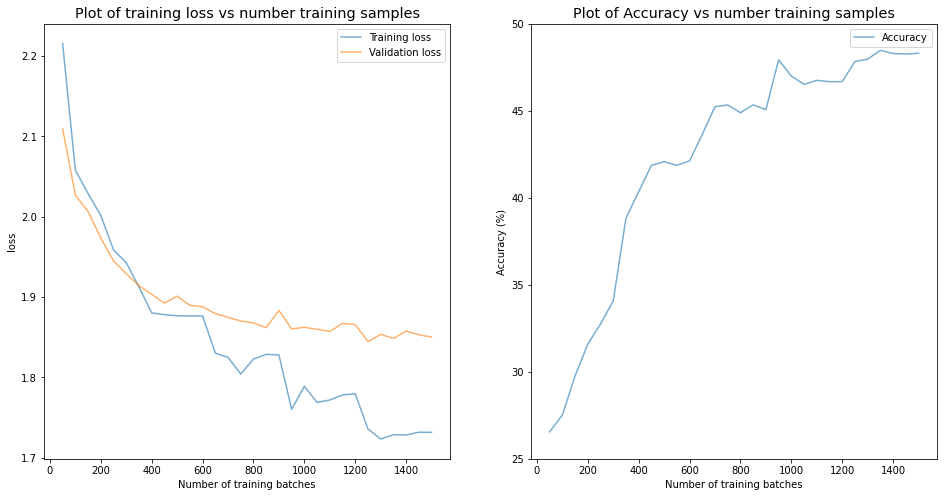

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(num_list1,train_loss_list1,label='Training loss',alpha=0.6)
plt.plot(num_list1,val_loss_list1,label='Validation loss',alpha=0.6)
plt.title('Plot of training loss vs number training samples',size='x-large')
plt.xlabel('Number of training batches')
plt.ylabel('loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(num_list1,accuracy_list1,label='Accuracy',alpha=0.6)
plt.ylim([25, 50])
plt.title('Plot of Accuracy vs number training samples',size='x-large')
plt.xlabel('Number of training batches')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
correct = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 49 %


### CNN2: 

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()

        #in-channels, out-channels, kernal size, stride, padding
        self.conv1 = nn.Conv2d(3, 64, (3,3), 1, 0)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d((2, 2), 2)

        self.conv2 = nn.Conv2d(64, 64, (3,3), 1, 0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d((2, 2), 2, (1,1)) #need padding since size is 13x13

        #fully connected that maps output to 512
        self.fc1 = nn.Linear(64 * 7 * 7, 512) #[(W−K+2P)/S]+1
        self.sigmoid1 = nn.Sigmoid()
        self.dropout1 = nn.Dropout(p=0.2)

        #fully connected that maps output to 512
        self.fc2 = nn.Linear(512, 512) #[(W−K+2P)/S]+1
        self.sigmoid2 = nn.Sigmoid()
        self.dropout2 = nn.Dropout(p=0.2)

        #fully connected at end that maps output to 10
        self.output = nn.Linear(512, 10) #[(W−K+2P)/S]+1
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):

        #conv1 => ReLu1 => maxpool
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        #conv2 => ReLu2
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        #flatten dimensions to pass through fully connected
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.sigmoid1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid2(x)
        x = self.dropout2(x)
        x = self.output(x)
        x = self.sigmoid3(x)

        return x
  
net2 = CNN2()

Loss function and optimizer



In [ ]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(net2.parameters(), lr=0.001)

Training the new network

In [ ]:
%%time

train_loss_list2 = []
val_loss_list2 = []
accuracy_list2 = []
num_list2 = []

cnt = 50

for epoch in range(5):  # loop over the dataset multiple times

    correct = 0
    total = 0

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] training loss: {running_loss / 50:.3f}')
            train_loss_list2.append(running_loss/50)
            num_list2.append(cnt)
            cnt+=50
            running_loss = 0.0

            val_running_loss = 0.0
            with torch.no_grad():
              for data in testloader:
                  images, labels = data
                  # calculate outputs by running images through the network
                  outputs = net2(images)
                  val_loss = criterion2(outputs, labels)
                  val_running_loss += val_loss.item()
                  # the class with the highest energy is what we choose as prediction
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()

            print(f'Validation loss: {val_running_loss/len(testloader):.3f}')
            print(f'Accuracy: {100 * correct // total} %')
            accuracy_list2.append(100*correct/total)
            val_loss_list2.append(val_running_loss/len(testloader))

print('Finished Training')

[1,    50] training loss: 2.263
Validation loss: 2.175
Accuracy: 21 %
[1,   100] training loss: 2.139
Validation loss: 2.106
Accuracy: 22 %
[1,   150] training loss: 2.111
Validation loss: 2.067
Accuracy: 24 %
[1,   200] training loss: 2.061
Validation loss: 2.025
Accuracy: 25 %
[1,   250] training loss: 2.020
Validation loss: 2.000
Accuracy: 26 %
[1,   300] training loss: 1.998
Validation loss: 1.983
Accuracy: 27 %
[2,    50] training loss: 1.971
Validation loss: 1.949
Accuracy: 39 %
[2,   100] training loss: 1.943
Validation loss: 1.940
Accuracy: 39 %
[2,   150] training loss: 1.922
Validation loss: 1.922
Accuracy: 39 %
[2,   200] training loss: 1.918
Validation loss: 1.902
Accuracy: 40 %
[2,   250] training loss: 1.911
Validation loss: 1.940
Accuracy: 40 %
[2,   300] training loss: 1.912
Validation loss: 1.905
Accuracy: 39 %
[3,    50] training loss: 1.891
Validation loss: 1.910
Accuracy: 42 %
[3,   100] training loss: 1.898
Validation loss: 1.883
Accuracy: 43 %
[3,   150] training 

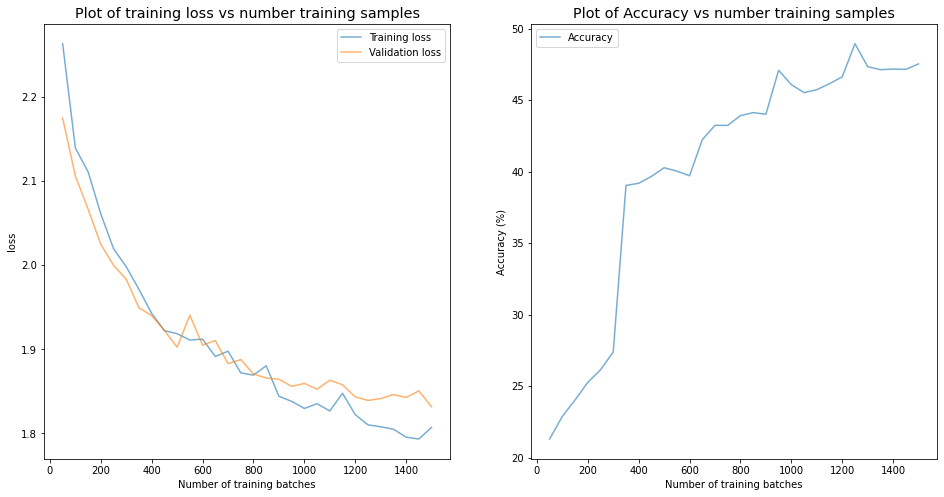

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(num_list2,train_loss_list2,label='Training loss',alpha=0.6)
plt.plot(num_list2,val_loss_list2,label='Validation loss',alpha=0.6)
plt.title('Plot of training loss vs number training samples',size='x-large')
plt.xlabel('Number of training batches')
plt.ylabel('loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(num_list2,accuracy_list2,label='Accuracy',alpha=0.6)
plt.title('Plot of Accuracy vs number training samples',size='x-large')
plt.xlabel('Number of training batches')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
correct = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 49 %


## References:

[1] PyTorch utils.Data: https://pytorch.org/docs/stable/data.html

[2] PyTorch Training a classifier: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

[3] Pandas library: https://pandas.pydata.org/

[4] Scikit-learn library: https://scikit-learn.org/stable/
